In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("heart.csv")

In [5]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [7]:
df.columns


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [9]:
df["ChestPainType"].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [11]:
df["Sex"].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [13]:
df["RestingECG"].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [15]:
df["ExerciseAngina"].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [17]:
df["ST_Slope"].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [19]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [21]:
df["Sex"].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [23]:
df.shape

(918, 12)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<Axes: >

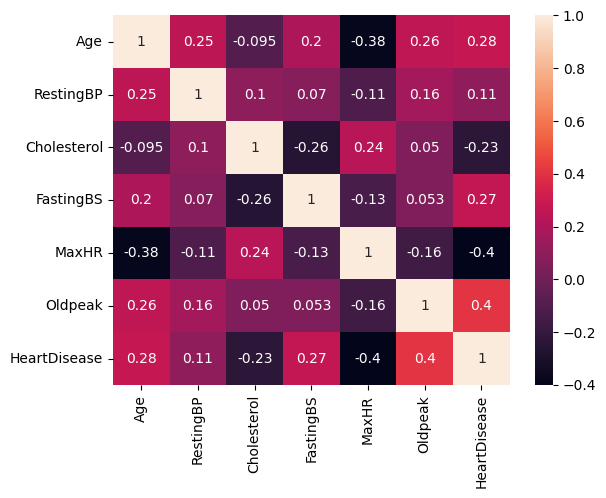

In [45]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [27]:
corr_df=df.corr(numeric_only=True)

In [29]:
corr_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [31]:
df.dropna(inplace = True)

In [33]:
df.shape

(918, 12)

In [35]:
df.drop_duplicates(inplace = True)

In [37]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# encoding

In [40]:
df["Sex"] = df["Sex"].map({"M":1,
"F":0})

In [42]:
df["ExerciseAngina"] = df["ExerciseAngina"].map({"N":1,
"Y":0})

In [44]:
df["RestingECG"]= df["RestingECG"].map({ "Normal":2,"LVH":1,"ST":0 })

In [46]:
df["ST_Slope"]= df["ST_Slope"].map({ "Flat":2,"Up":1,"Down ":0 })

In [48]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,2,172,1,0.0,1.0,0
1,49,0,NAP,160,180,0,2,156,1,1.0,2.0,1
2,37,1,ATA,130,283,0,0,98,1,0.0,1.0,0
3,48,0,ASY,138,214,0,2,108,0,1.5,2.0,1
4,54,1,NAP,150,195,0,2,122,1,0.0,1.0,0


In [50]:
df = pd.get_dummies(df,columns=["ChestPainType"],drop_first = True)

In [52]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140,289,0,2,172,1,0.0,1.0,0,True,False,False
1,49,0,160,180,0,2,156,1,1.0,2.0,1,False,True,False
2,37,1,130,283,0,0,98,1,0.0,1.0,0,True,False,False
3,48,0,138,214,0,2,108,0,1.5,2.0,1,False,False,False
4,54,1,150,195,0,2,122,1,0.0,1.0,0,False,True,False


In [54]:
df.isnull()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [56]:
df.fillna(0).astype(int)

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140,289,0,2,172,1,0,1,0,1,0,0
1,49,0,160,180,0,2,156,1,1,2,1,0,1,0
2,37,1,130,283,0,0,98,1,0,1,0,1,0,0
3,48,0,138,214,0,2,108,0,1,2,1,0,0,0
4,54,1,150,195,0,2,122,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,2,132,1,1,2,1,0,0,1
914,68,1,144,193,1,2,141,1,3,2,1,0,0,0
915,57,1,130,131,0,2,115,0,1,2,1,0,0,0
916,57,0,130,236,0,1,174,1,0,2,1,1,0,0


<Axes: xlabel='RestingBP', ylabel='Count'>

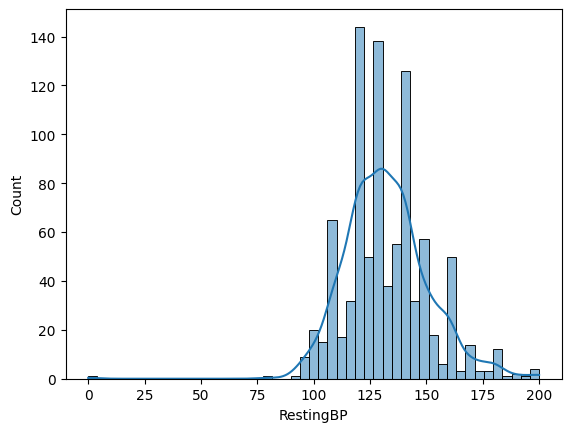

In [58]:
sns.histplot(x=df["RestingBP"],kde = True)

<Axes: xlabel='Sex', ylabel='count'>

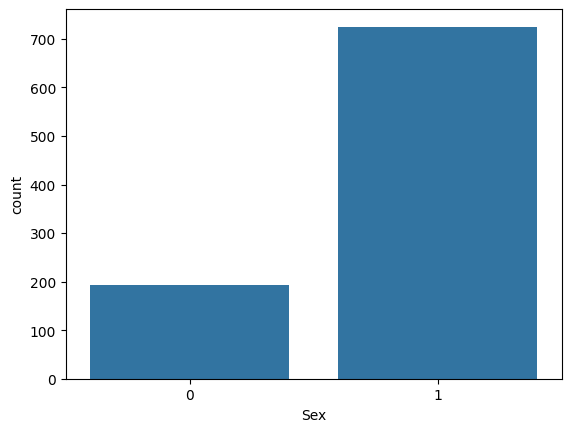

In [66]:
sns.countplot(x=df["Sex"])

In [64]:
sns.countplot(x=  df["ChestPainType"])

KeyError: 'ChestPainType'

<Axes: ylabel='Cholesterol'>

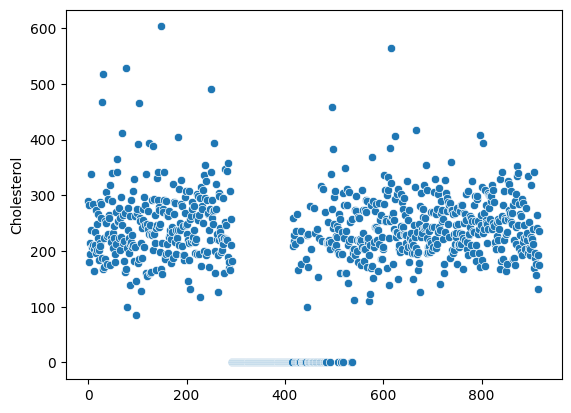

In [68]:
sns.scatterplot(df["Cholesterol"])

<Axes: xlabel='RestingECG', ylabel='count'>

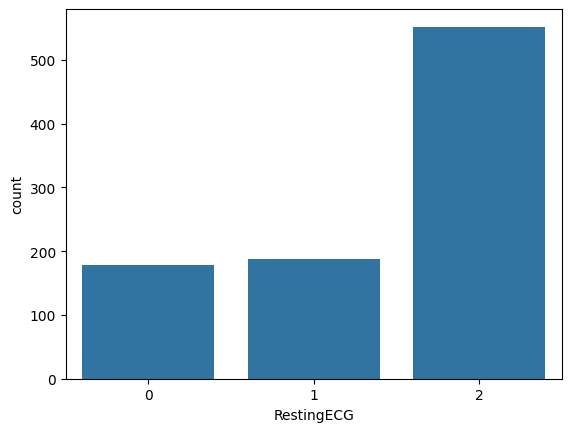

In [70]:
sns.countplot(x=df["RestingECG"])

In [72]:
df.shape

(918, 14)

In [74]:
print(918-550)

368


In [27]:
print(368/2)

184.0


In [29]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<Axes: xlabel='ST_Slope', ylabel='count'>

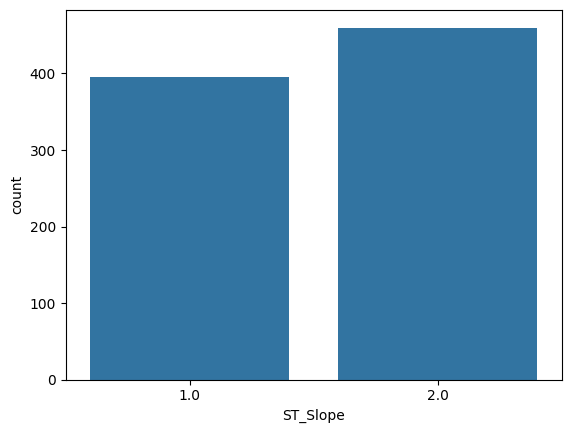

In [76]:
sns.countplot(x=df["ST_Slope"])

In [78]:
df['Cholesterol'].fillna(df['Cholesterol'].mean(), inplace=True)


In [80]:
df_cleaned = df.copy()

In [82]:
df_cleaned

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140,289,0,2,172,1,0.0,1.0,0,True,False,False
1,49,0,160,180,0,2,156,1,1.0,2.0,1,False,True,False
2,37,1,130,283,0,0,98,1,0.0,1.0,0,True,False,False
3,48,0,138,214,0,2,108,0,1.5,2.0,1,False,False,False
4,54,1,150,195,0,2,122,1,0.0,1.0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,2,132,1,1.2,2.0,1,False,False,True
914,68,1,144,193,1,2,141,1,3.4,2.0,1,False,False,False
915,57,1,130,131,0,2,115,0,1.2,2.0,1,False,False,False
916,57,0,130,236,0,1,174,1,0.0,2.0,1,True,False,False


In [84]:
# Save the cleaned DataFrame to a CSV file
df_cleaned.to_csv('Heart_Clean.csv', index=False)


In [86]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140,289,0,2,172,1,0.0,1.0,0,True,False,False
1,49,0,160,180,0,2,156,1,1.0,2.0,1,False,True,False
2,37,1,130,283,0,0,98,1,0.0,1.0,0,True,False,False
3,48,0,138,214,0,2,108,0,1.5,2.0,1,False,False,False
4,54,1,150,195,0,2,122,1,0.0,1.0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,2,132,1,1.2,2.0,1,False,False,True
914,68,1,144,193,1,2,141,1,3.4,2.0,1,False,False,False
915,57,1,130,131,0,2,115,0,1.2,2.0,1,False,False,False
916,57,0,130,236,0,1,174,1,0.0,2.0,1,True,False,False


In [94]:
df_cleaned.isnull().sum()  

Age                   0
Sex                   0
RestingBP             0
Cholesterol           0
FastingBS             0
RestingECG            0
MaxHR                 0
ExerciseAngina        0
Oldpeak               0
ST_Slope             63
HeartDisease          0
ChestPainType_ATA     0
ChestPainType_NAP     0
ChestPainType_TA      0
dtype: int64

In [96]:
df.columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG',
       'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA'],
      dtype='object')

In [108]:
df_cleaned['ST_Slope'].fillna(df_cleaned['ST_Slope'].mean(), inplace=True)


In [114]:
df_cleaned= df_cleaned.astype(int)

In [110]:
df_cleaned

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140,289,0,2,172,1,0.0,1.0,0,True,False,False
1,49,0,160,180,0,2,156,1,1.0,2.0,1,False,True,False
2,37,1,130,283,0,0,98,1,0.0,1.0,0,True,False,False
3,48,0,138,214,0,2,108,0,1.5,2.0,1,False,False,False
4,54,1,150,195,0,2,122,1,0.0,1.0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,2,132,1,1.2,2.0,1,False,False,True
914,68,1,144,193,1,2,141,1,3.4,2.0,1,False,False,False
915,57,1,130,131,0,2,115,0,1.2,2.0,1,False,False,False
916,57,0,130,236,0,1,174,1,0.0,2.0,1,True,False,False


In [112]:
df_cleaned.isnull().sum()

Age                  0
Sex                  0
RestingBP            0
Cholesterol          0
FastingBS            0
RestingECG           0
MaxHR                0
ExerciseAngina       0
Oldpeak              0
ST_Slope             0
HeartDisease         0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
dtype: int64

In [116]:
df_cleaned = df_cleaned.astype(int)

In [118]:
df_cleaned

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140,289,0,2,172,1,0,1,0,1,0,0
1,49,0,160,180,0,2,156,1,1,2,1,0,1,0
2,37,1,130,283,0,0,98,1,0,1,0,1,0,0
3,48,0,138,214,0,2,108,0,1,2,1,0,0,0
4,54,1,150,195,0,2,122,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,2,132,1,1,2,1,0,0,1
914,68,1,144,193,1,2,141,1,3,2,1,0,0,0
915,57,1,130,131,0,2,115,0,1,2,1,0,0,0
916,57,0,130,236,0,1,174,1,0,2,1,1,0,0


In [120]:
from sklearn.preprocessing import StandardScaler

In [122]:
scaler = StandardScaler()

In [128]:
columns = ['Age','RestingBP','Cholesterol','RestingECG','MaxHR']

In [135]:
df_cleaned[columns]  = scaler.fit_transform(df_cleaned[columns])

In [137]:
df_cleaned.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,-1.433140,1,0.410909,0.825070,0,0.747055,1.382928,1,0,1,0,1,0,0
1,-0.478484,0,1.491752,-0.171961,0,0.747055,0.754157,1,1,2,1,0,1,0
2,-1.751359,1,-0.129513,0.770188,0,-1.774257,-1.525138,1,0,1,0,1,0,0
3,-0.584556,0,0.302825,0.139040,0,0.747055,-1.132156,0,1,2,1,0,0,0
4,0.051881,1,0.951331,-0.034755,0,0.747055,-0.581981,1,0,1,0,0,1,0


In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



In [172]:
X = df_cleaned.drop(["HeartDisease"],axis =1 )
y = df_cleaned['HeartDisease']

In [174]:
X

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,-1.433140,1,0.410909,0.825070,0,0.747055,1.382928,1,0,1,1,0,0
1,-0.478484,0,1.491752,-0.171961,0,0.747055,0.754157,1,1,2,0,1,0
2,-1.751359,1,-0.129513,0.770188,0,-1.774257,-1.525138,1,0,1,1,0,0
3,-0.584556,0,0.302825,0.139040,0,0.747055,-1.132156,0,1,2,0,0,0
4,0.051881,1,0.951331,-0.034755,0,0.747055,-0.581981,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,1,-1.210356,0.596393,0,0.747055,-0.188999,1,1,2,0,0,1
914,1.536902,1,0.627078,-0.053049,1,0.747055,0.164684,1,3,2,0,0,0
915,0.370100,1,-0.129513,-0.620168,0,0.747055,-0.857069,0,1,2,0,0,0
916,0.370100,0,-0.129513,0.340275,0,-0.513601,1.461525,1,0,2,1,0,0


In [176]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [180]:
X_test,X_train,y_test,y_train = train_test_split(X,y,random_state = 42 , test_size = 0.2)

In [182]:
X_test

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
795,-1.220994,1,-0.669935,0.376864,1,0.747055,2.247488,1,0,1,0,1,0
25,-1.857431,1,-0.129513,0.093304,0,0.747055,1.618717,1,0,1,0,1,0
84,0.264027,1,0.951331,0.129892,1,0.747055,-0.464087,0,1,2,0,0,0
10,-1.751359,0,-0.129513,0.111598,0,0.747055,0.203982,1,0,1,0,1,0
344,-0.266338,1,-0.669935,-1.818435,1,0.747055,-1.289349,1,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.584556,0,-0.669935,0.504923,0,-1.774257,-1.053560,1,0,1,0,0,0
270,-0.902775,1,-0.669935,0.239657,0,0.747055,0.125386,1,0,1,0,0,0
860,0.688318,1,-0.129513,0.495776,0,0.747055,0.282579,0,1,1,0,0,0
435,0.688318,1,1.059415,-1.818435,0,-1.774257,-0.739174,0,0,1,0,0,0


In [184]:
X_train

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
668,1.006537,0,0.410909,-0.034755,0,0.747055,1.658016,1,0,1,1,0,0
30,-0.054192,1,0.681120,2.919751,0,0.747055,-0.267596,1,0,2,0,1,0
377,1.218683,1,1.491752,-1.818435,1,-1.774257,-0.581981,1,1,2,0,0,0
535,0.264027,1,-0.129513,-1.818435,0,-0.513601,-0.581981,0,1,2,0,0,0
807,0.051881,1,-1.318441,1.008012,0,0.747055,0.754157,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,-0.372411,0,0.410909,0.815923,0,0.747055,0.125386,0,0,2,0,1,0
745,1.006537,0,-1.318441,0.642129,0,0.747055,1.265034,0,1,2,0,0,0
584,1.112610,1,0.464951,0.413452,1,-1.774257,-0.817771,0,1,2,0,0,0
878,-0.478484,1,-0.129513,0.614688,0,0.747055,1.343630,1,0,1,1,0,0


In [186]:
y_test

795    0
25     0
84     1
10     0
344    1
      ..
106    0
270    0
860    1
435    0
102    1
Name: HeartDisease, Length: 734, dtype: int64

In [188]:
y_train


668    0
30     1
377    1
535    1
807    0
      ..
211    1
745    1
584    1
878    0
451    1
Name: HeartDisease, Length: 184, dtype: int64

In [194]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [196]:
X_train_scaled

array([[ 1.03813138, -2.41139271,  0.55273687, ...,  2.10042013,
        -0.53545615, -0.28697202],
       [ 0.0050531 ,  0.41469811,  0.82193641, ..., -0.47609523,
         1.86756657, -0.28697202],
       [ 1.24474703,  0.41469811,  1.62953502, ..., -0.47609523,
        -0.53545615, -0.28697202],
       ...,
       [ 1.14143921,  0.41469811,  0.60657678, ..., -0.47609523,
        -0.53545615, -0.28697202],
       [-0.40817821,  0.41469811,  0.0143378 , ...,  2.10042013,
        -0.53545615, -0.28697202],
       [ 1.14143921,  0.41469811,  0.7680965 , ..., -0.47609523,
        -0.53545615, -0.28697202]], shape=(184, 13))

In [214]:
model = {
      "LogisticRegression": LogisticRegression(),
    "GaussianNB": GaussianNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "SVC":SVC(),
    " KNeighborsClassifier":  KNeighborsClassifier()
}

In [216]:
result =[]

In [218]:
for name,model in model.items():
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    result.append({
        'model':name,
        'Accuracy': round(acc,4),
        'f1_score': round(f1,4)
    })

In [220]:
result

[{'model': 'LogisticRegression', 'Accuracy': 0.8351, 'f1_score': 0.8575},
 {'model': 'GaussianNB', 'Accuracy': 0.8501, 'f1_score': 0.8665},
 {'model': 'DecisionTreeClassifier', 'Accuracy': 0.7507, 'f1_score': 0.7803},
 {'model': 'SVC', 'Accuracy': 0.8556, 'f1_score': 0.8756},
 {'model': ' KNeighborsClassifier', 'Accuracy': 0.8283, 'f1_score': 0.8504}]

In [242]:
import joblib
joblib.dump(model, 'SVC_heart.pkl')  # ✅ Save directly

['SVC_heart.pkl']

In [240]:
import joblib
joblib.dump(model, 'KNN_heart.pkl')  # ✅ Save directly

['KNN_heart.pkl']

In [230]:
joblib.dump(X.columns.tolist(),'columns.pkl')

['columns.pkl']

In [232]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']